In [1]:
# ESTE ES EL DEL PAPER 2

import matplotlib.pyplot as plt
import pymongo
import numpy as np
import pandas as pd
import json
from bson import json_util, ObjectId
import re
import ast
import seaborn as sns
import matplotlib.dates as mdates
import itertools
import networkx as nx

from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta


def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta

In [2]:
DG = nx.read_graphml("GRAPHS/2019-12_graph.graphml")

In [3]:
DG.remove_node('R')
nx.info(DG)


'Name: \nType: DiGraph\nNumber of nodes: 15516\nNumber of edges: 66594\nAverage in degree:   4.2920\nAverage out degree:   4.2920'

In [54]:
4.292*2

8.584

In [50]:
4.811*2

9.622

# POWER LAW

In [8]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import math

def plotDegDistLogLog(G, loglog = True):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    frac = [n/G.number_of_nodes() for n in cnt]
    fig, ax = plt.subplots()
    plt.plot(deg, frac, 'o')
    if loglog:
        ax.set_yscale('log', nonposy='clip')
        ax.set_xscale('log', nonposx='clip')
    plt.ylabel("Fraction of nodes")
    plt.xlabel("Degree")

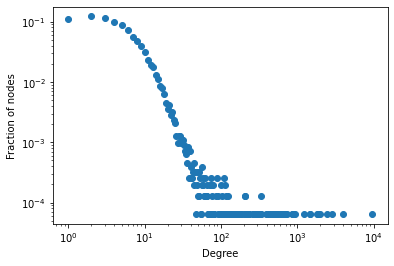

In [76]:
plotDegDistLogLog(DG)

In [5]:
import powerlaw
print(powerlaw.__version__)

1.4.4


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/mmora/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
DG2 = max(nx.weakly_connected_components(DG), key=len)
SG = DG.subgraph(DG2)

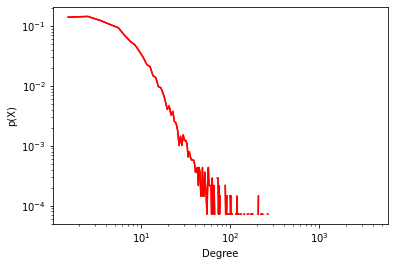

In [15]:
data = sorted([d for n, d in SG.degree], reverse=True)
####
figPDF = powerlaw.plot_pdf(data, linear_bins=True, color='r')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree")
figname = 'FigPDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


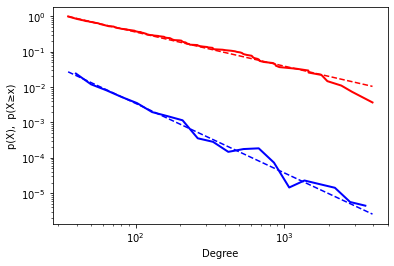

In [16]:
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Degree")

figname = 'FigCCDF'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/home/mmora/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: 

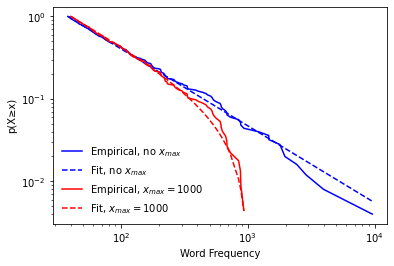

In [83]:
fit = powerlaw.Fit(data, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
#x, y = powerlaw.ccdf(data, xmax=max(data))
#fig1.plot(x,y)
####
#FigCCDFmax.set_ylabel(r"$p(X\geq x)$")
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Word Frequency")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

figname = 'FigCCDFmax'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


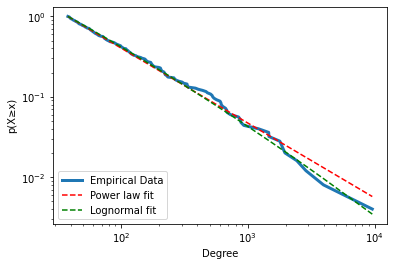

In [84]:
fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Degree")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [85]:
R, p = fit.distribution_compare('power_law', 'lognormal',normalized_ratio = True)
print(R,p)

-0.5534176362307135 0.5799774651818828


In [86]:
fit.power_law.alpha

1.93100499021419

In [9]:
math.exp(-0.5*(1/(1.93100499021419-1))*4.8110*2)

0.0056986039040063455

In [10]:
0.0056986039040063455*13838

78.85728082363981

In [30]:
R, p = fit.distribution_compare('exponential', 'lognormal',normalized_ratio = True)
print(R,p)

-3.891807200038323 9.95003013062677e-05


In [39]:
R, p = fit.distribution_compare('truncated_power_law', 'lognormal',normalized_ratio = True)
print(R,p)

1.4323557794823079 0.15204202712962972


In [32]:
fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

# ANALISIS RED 12/19

In [98]:
DG = nx.read_graphml("GRAPHS/2019-12_graph.graphml")

In [62]:
# PENDING: BORRAR EL NODO DE R.
DG.remove_node('R')

NetworkXError: The node R is not in the digraph.

In [53]:
mongo = pymongo.MongoClient("mongodb://localhost:27017/")
database = mongo["PY_CRAN"]
collection = database["R_packages"]

collection_packages = list(collection.find({}, {'_id': False}))

packages = []
for c in collection_packages:
    packages.append(json.loads(json_util.dumps(c)))

In [54]:
list_pkgs = []
for i in packages:
    list_pkgs.append(i['Package'])

In [43]:
#list_pkgs = [w.replace('.', '_') for w in list_pkgs]

In [105]:
len(list(DG.nodes()))

15516

In [26]:
# PAQUETES BASE:

# https://stat.ethz.ch/R-manual/R-patched/doc/manual/R-FAQ.html#Which-add_002don-packages-exist-for-R_003f

base = ['base', 'compiler','datasets','grDevices','graphics','grid','methods','parallel','splines','stats',
 'stats4','tcltk','tools','utils']

base_add_ons = ['KernSmooth', 'MASS','Matrix','boot','class','cluster','codetools','foreign','lattice','mgcv',
 'nlme','nnet','rpart','spatial','survival']

In [107]:
diffs = list(set(list(DG.nodes())) - set(list_pkgs)- set(base))
diffs

['Rsamtools',
 'GOstats',
 'widgetTools',
 'vsn',
 'GenomeInfoDb',
 'org.Ce.eg.db',
 'graphite',
 'clusterProfiler',
 'fabia',
 'RDAVIDWebService',
 'globaltest',
 'SeqArray',
 'geneplotter',
 'aroma.light',
 'a4Core',
 'GlobalAncova',
 'Biobase',
 'mixOmics',
 'preprocessCore',
 'affy',
 'DESeq2',
 'lfa',
 'multtest',
 'Rgraphviz',
 'GEOquery',
 'qvalue',
 'annotate',
 'org.Mm.eg.db',
 'BioSeqClass',
 'genefilter',
 'siggenes',
 'flowWorkspace',
 'flowDensity',
 'EmpiricalBrownsMethod',
 'EBImage',
 'GEOmetadb',
 'genbankr',
 'RedeR',
 'qusage',
 'supraHex',
 'VariantAnnotation',
 'tweeDEseq',
 'ComplexHeatmap',
 'GOSemSim',
 'ChemmineR',
 'GO.db',
 'biomaRt',
 'ALL',
 'DNAcopy',
 'gcrma',
 'tsp',
 'AnnotationDbi',
 'Mfuzz',
 'SeqVarTools',
 'SummarizedExperiment',
 'beadarray',
 'ropls',
 'flowCore',
 'RankProd',
 'GSEABase',
 'MEIGOR',
 'BiocParallel',
 'breastCancerVDX',
 'bamsignals',
 'apeglm',
 'GSVA',
 'piano',
 'safe',
 'ggtree',
 'MassSpecWavelet',
 'BSgenome',
 'IRanges',
 '

In [108]:
len(diffs)

134

In [ ]:
# HAY 134 paquetes en BIOCONDUCTOR y no en CRAN

In [5]:
giant_comp = max(nx.weakly_connected_components(DG), key=len)
SG = DG.subgraph(giant_comp)

In [6]:
nx.info(SG)

'Name: \nType: DiGraph\nNumber of nodes: 13838\nNumber of edges: 66574\nAverage in degree:   4.8110\nAverage out degree:   4.8110'

In [111]:
len(list(set(list(SG.nodes())) - set(diffs)))

13706

In [112]:
13838 - 13706

132

In [60]:
nx.average_clustering(SG)

0.1029411969169011

In [67]:
# PARA DIRIGIDOS

def metricas_grafo(G):
    print('AVG CLUSTERING: ' + str(nx.average_clustering(nx.to_undirected(G))))
    print('AVG PATH: ' + str(nx.average_shortest_path_length(nx.to_undirected(G))))

In [65]:
metricas_grafo(SG)

AVG CLUSTERING: 0.2058823938338022
AVG PATH: 3.0993699662401224


NetworkXNotImplemented: not implemented for directed type

In [66]:
 print('EFFICIENCY: ' + str(nx.global_efficiency(nx.to_undirected(SG))))

KeyboardInterrupt: 

## MÉTRICAS DE CENTRALIDAD (GRAFO COMPLETO)

In [113]:
betweenness_centrality = nx.betweenness_centrality(SG)
harmonic_centrality = nx.harmonic_centrality(SG)
degree_centrality = nx.degree_centrality(SG)

In [118]:
BC = {k: v for k, v in sorted(betweenness_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

HC = {k: v/(len(list(SG.nodes()))-1) for k, v in sorted(harmonic_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

DC = {k: v for k, v in sorted(degree_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

In [125]:
for x in list(BC)[0:10]:
    print("key {}, value {} ".format(x,  BC[x]))

key ggplot2, value 0.00040153986267307893 
key tibble, value 0.00019910763338527992 
key scales, value 0.0001007566212606331 
key dplyr, value 9.368784025706351e-05 
key pillar, value 8.24627933405285e-05 
key Hmisc, value 7.643158735719287e-05 
key rgl, value 6.904812007882635e-05 
key vctrs, value 6.390748591041668e-05 
key car, value 6.168459337216812e-05 
key shiny, value 5.8215136114770175e-05 


In [126]:
for x in list(HC)[0:10]:
    print("key {}, value {} ".format(x,  HC[x]))

key stats, value 0.5106152586061297 
key methods, value 0.4990351954903293 
key utils, value 0.47654477126542116 
key graphics, value 0.37311143001679686 
key grDevices, value 0.34416299294160174 
key Rcpp, value 0.3063718050637265 
key MASS, value 0.22633880176339471 
key grid, value 0.2253812242538369 
key lattice, value 0.20680129535373837 
key magrittr, value 0.20621143449069634 


In [127]:
for x in list(DC)[0:10]:
    print("key {}, value {} ".format(x,  DC[x]))

key stats, value 0.2856833128568331 
key methods, value 0.2078485220784852 
key utils, value 0.1760497217604972 
key graphics, value 0.1417937414179374 
key ggplot2, value 0.1347112813471128 
key Rcpp, value 0.1292187612921876 
key MASS, value 0.1059478210594782 
key dplyr, value 0.1054419310544193 
key grDevices, value 0.087446700874467 
key magrittr, value 0.067211100672111 


## SERIA INTERESSANT FER UN GRAFO EN EL QUE LES DEPENDÈNCIES TRANSITIVES TAMBÉ APAREGUESSIN

## TRANSITIVE CLOSURE, ÉS A NETWORKX

In [128]:
TG = nx.transitive_closure(SG)
nx.write_graphml_lxml(TG, "TG.graphml")

In [10]:
TG = nx.read_graphml("TG.graphml")

In [11]:
nx.info(TG)

'Name: \nType: DiGraph\nNumber of nodes: 13838\nNumber of edges: 381998\nAverage in degree:  27.6050\nAverage out degree:  27.6050'

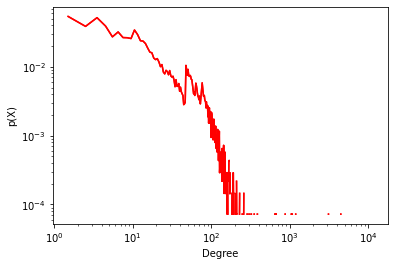

In [12]:
data = sorted([d for n, d in TG.degree], reverse=True)
####
figPDF = powerlaw.plot_pdf(data, linear_bins=True, color='r')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree")
figname = 'FigPDF2'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:1560: RuntimeWarning: invalid value encountered in true_divide
  return likelihoods/norm
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


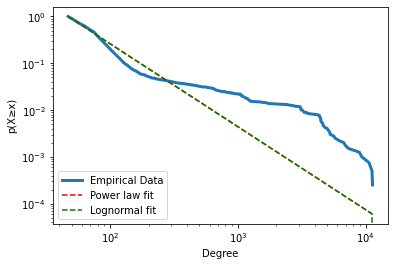

In [132]:
fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Degree")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal2'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [144]:
fit = powerlaw.Fit(data, discrete=True)


Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [145]:
fit.alpha

2.769373907095996

In [146]:
R, p = fit.distribution_compare('power_law', 'lognormal',normalized_ratio = True)
print(R,p)

-0.9279755171623685 0.35342026959856276


/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:1560: RuntimeWarning: invalid value encountered in true_divide
  return likelihoods/norm


Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


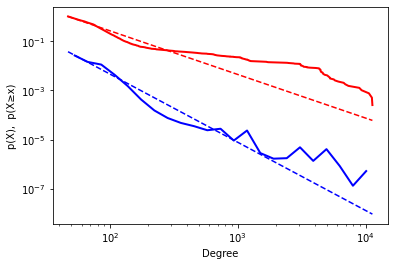

In [13]:
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Degree")

figname = 'FigCCDF_TC'
savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [153]:
math.exp(-0.5*(1/(2.769373907095996-1))*27.6)

0.00040999360343471625

In [154]:
0.0004*14000

5.6000000000000005

In [ ]:
# HAGO EL SIN BASE

In [69]:
SG_aux = SG.copy()

for package in base+base_add_ons:
    SG_aux.remove_node(package)

giant_comp = max(nx.weakly_connected_components(SG_aux), key=len)
SG_aux2 = DG.subgraph(giant_comp)
    
TG_nobase = nx.transitive_closure(SG_aux2)
nx.write_graphml_lxml(TG_nobase, "TG_nobase.graphml")

In [70]:
nx.info(TG_nobase)

'Name: \nType: DiGraph\nNumber of nodes: 12686\nNumber of edges: 274449\nAverage in degree:  21.6340\nAverage out degree:  21.6340'

In [71]:
21.63*2

43.26

Calculating best minimal value for power law fit
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/mmora/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


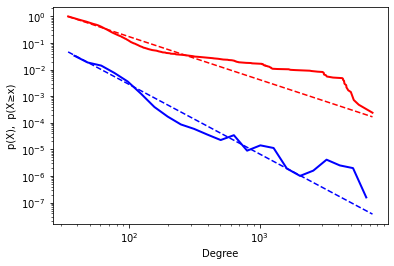

In [72]:
data = sorted([d for n, d in TG_nobase.degree], reverse=True)
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Degree")

figname = 'FigCCDF_nobase'
plt.savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)

In [73]:
fit.alpha

2.613140425453544

In [74]:
math.exp(-0.5*(1/(2.613140425453544-1))*21.634)

0.0012240945441836187

In [75]:
0.0012240945441836187*len(list(TG_nobase.nodes()))

15.528863387513388

In [36]:
betweenness_centrality = nx.betweenness_centrality(TG_nobase)
harmonic_centrality = nx.harmonic_centrality(TG_nobase)
degree_centrality = nx.degree_centrality(TG_nobase)

In [37]:
BC = {k: v for k, v in sorted(betweenness_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

HC = {k: v/(len(list(TG_nobase.nodes()))-1) for k, v in sorted(harmonic_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

DC = {k: v for k, v in sorted(degree_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

In [41]:
for x in list(BC)[0:20]:
    print("key {}, value {} ".format(x,  BC[x]))

key A3, value 0.0 
key pbapply, value 0.0 
key xtable, value 0.0 
key ABACUS, value 0.0 
key ggplot2, value 0.0 
key shiny, value 0.0 
key ABC.RAP, value 0.0 
key ABCanalysis, value 0.0 
key plotrix, value 0.0 
key ABCoptim, value 0.0 
key Rcpp, value 0.0 
key ABCp2, value 0.0 
key ABHgenotypeR, value 0.0 
key reshape2, value 0.0 
key ABPS, value 0.0 
key kernlab, value 0.0 
key ACA, value 0.0 
key ACDm, value 0.0 
key Rsolnp, value 0.0 
key dplyr, value 0.0 


In [39]:
for x in list(HC)[0:10]:
    print("key {}, value {} ".format(x,  HC[x]))

key Rcpp, value 0.5310689455388181 
key magrittr, value 0.4167149478563152 
key glue, value 0.38173522595596754 
key digest, value 0.37391367323290847 
key R6, value 0.36754055619930476 
key rlang, value 0.3624710312862109 
key pkgconfig, value 0.3458864426419467 
key crayon, value 0.34052723059096174 
key assertthat, value 0.3351680185399768 
key stringi, value 0.334805909617613 


In [42]:
for x in list(DC)[0:20]:
    print("key {}, value {} ".format(x,  DC[x]))

key Rcpp, value 0.5310689455388181 
key magrittr, value 0.4167149478563152 
key glue, value 0.38173522595596754 
key digest, value 0.37391367323290847 
key R6, value 0.36754055619930476 
key rlang, value 0.3624710312862109 
key pkgconfig, value 0.3458864426419467 
key crayon, value 0.34052723059096174 
key assertthat, value 0.3351680185399768 
key stringi, value 0.334805909617613 
key backports, value 0.3330677867902665 
key ellipsis, value 0.32546349942062575 
key vctrs, value 0.322856315179606 
key zeallot, value 0.32278389339513325 
key cli, value 0.32155272305909616 
key fansi, value 0.32133545770567784 
key pillar, value 0.31612108922363846 
key utf8, value 0.3155417149478563 
key tibble, value 0.31525202780996525 
key stringr, value 0.3111239860950174 


# COMUNIDADES

In [6]:
TG = nx.read_graphml("TG.graphml")

In [4]:
from cdlib import algorithms

In [5]:
coms = algorithms.leiden(TG)

In [6]:
coms

In [6]:
len(coms.communities)

10

In [7]:
TGC = TG.copy()

i=0
for community in coms.communities:
    for package in community:
        TGC.nodes[package]['community'] = i
    i=i+1

In [8]:
nx.write_graphml_lxml(TGC, "TGC.graphml")

In [9]:
TGC.nodes(data=True)

NodeDataView({'A3': {'community': 0}, 'pbapply': {'community': 0}, 'xtable': {'community': 2}, 'ABACUS': {'community': 2}, 'ggplot2': {'community': 2}, 'shiny': {'community': 2}, 'ABC.RAP': {'community': 0}, 'graphics': {'community': 0}, 'stats': {'community': 0}, 'utils': {'community': 0}, 'ABCanalysis': {'community': 0}, 'plotrix': {'community': 0}, 'ABCoptim': {'community': 0}, 'Rcpp': {'community': 0}, 'ABCp2': {'community': 0}, 'MASS': {'community': 0}, 'ABHgenotypeR': {'community': 1}, 'reshape2': {'community': 2}, 'ABPS': {'community': 0}, 'kernlab': {'community': 3}, 'ACA': {'community': 0}, 'grDevices': {'community': 0}, 'ACDm': {'community': 1}, 'Rsolnp': {'community': 0}, 'dplyr': {'community': 1}, 'plyr': {'community': 2}, 'zoo': {'community': 0}, 'ACEt': {'community': 0}, 'splines': {'community': 0}, 'ACMEeqtl': {'community': 0}, 'filematrix': {'community': 0}, 'parallel': {'community': 0}, 'ACNE': {'community': 5}, 'R.filesets': {'community': 5}, 'R.methodsS3': {'communit

In [37]:
for community in coms.communities:
    print(community)

['A3', 'pbapply', 'xtable', 'ABACUS', 'ggplot2', 'shiny', 'ABC.RAP', 'graphics', 'stats', 'utils', 'ABCanalysis', 'plotrix', 'ABCoptim', 'Rcpp', 'ABCp2', 'MASS', 'ABHgenotypeR', 'reshape2', 'ABPS', 'kernlab', 'ACA', 'grDevices', 'ACDm', 'Rsolnp', 'dplyr', 'plyr', 'zoo', 'ACEt', 'splines', 'ACMEeqtl', 'filematrix', 'parallel', 'ACNE', 'R.filesets', 'R.methodsS3', 'R.oo', 'R.utils', 'aroma.affymetrix', 'aroma.core', 'matrixStats', 'ACSNMineR', 'gridExtra', 'scales', 'ACSWR', 'ACTCD', 'GDINA', 'ADAPTS', 'ComICS', 'WGCNA', 'doParallel', 'e1071', 'foreach', 'missForest', 'nnls', 'pcaMethods', 'pheatmap', 'preprocessCore', 'quantmod', 'ADCT', 'mvtnorm', 'ADDT', 'Matrix', 'coneproj', 'nlme', 'ADGofTest', 'ADMM', 'Rdpack', 'ADMMnet', 'ADMMsigma', 'RcppProgress', 'ADPF', 'ADPclust', 'cluster', 'fields', 'knitr', 'AEDForecasting', 'changepoint', 'forecast', 'signal', 'AER', 'Formula', 'car', 'lmtest', 'sandwich', 'survival', 'AF', 'base', 'data.table', 'drgee', 'ivtools', 'stdReg', 'AFM', 'dbsca

# ÁRBOL DEPENDENCIAS

In [21]:
DG = nx.read_graphml("GRAPHS/2019-12_graph.graphml")
DG2 = max(nx.weakly_connected_components(DG), key=len)
SG = DG.subgraph(DG2).copy()

In [22]:
SG.remove_node('R')

In [25]:
lista_raiz = []
for node in SG.nodes():
    if SG.in_degree(node) == 0:
        lista_raiz.append(node)        

In [26]:
lista_raiz

['A3',
 'ABACUS',
 'ABC.RAP',
 'ABCanalysis',
 'ABCoptim',
 'ABCp2',
 'ABHgenotypeR',
 'ABPS',
 'ACA',
 'ACD',
 'ACDm',
 'ACEt',
 'ACMEeqtl',
 'ACNE',
 'ACSNMineR',
 'ACSWR',
 'ACTCD',
 'ADAPTS',
 'ADCT',
 'ADDT',
 'ADMMnet',
 'ADMMsigma',
 'ADPF',
 'ADPclust',
 'AEDForecasting',
 'AF',
 'AFM',
 'AFheritability',
 'AGD',
 'AGHmatrix',
 'AGSDest',
 'AHM',
 'AHMbook',
 'AHR',
 'AID',
 'AIG',
 'ALA4R',
 'ALEPlot',
 'ALS',
 'ALSM',
 'ALTopt',
 'ALassoSurvIC',
 'AMCP',
 'AMIAS',
 'AMModels',
 'AMOEBA',
 'AMPLE',
 'AMR',
 'ANN2',
 'ANOM',
 'ANOVA.TFNs',
 'ANOVAIREVA',
 'ANOVAShiny',
 'ANOVAreplication',
 'APCanalysis',
 'APFr',
 'APIS',
 'APML0',
 'APPEstimation',
 'APtools',
 'AR',
 'AR1seg',
 'ARCensReg',
 'ARHT',
 'ARIbrain',
 'AROC',
 'ARPobservation',
 'ART',
 'ARTIVA',
 'ARTP2',
 'ARTool',
 'ARpLMEC',
 'ASGS.foyer',
 'ASIP',
 'ASMap',
 'ASPBay',
 'ASSA',
 'ASSISTant',
 'ASSOCShiny',
 'AST',
 'ATR',
 'ATmet',
 'AUtests',
 'AWR.Athena',
 'AWR.KMS',
 'AWR.Kinesis',
 'AbSim',
 'AbsFilterGS

/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.i

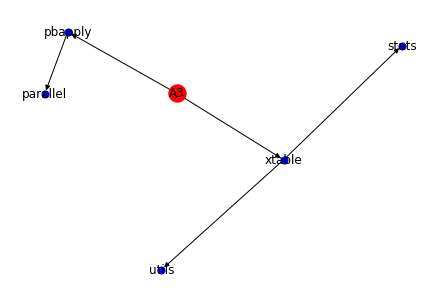

In [30]:
hub_ego = nx.ego_graph(SG, 'A3', radius=7)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=['A3'], node_size=300, node_color='r')
nx.draw_networkx_labels(hub_ego, pos)
plt.show()

/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/home/mmora/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.i

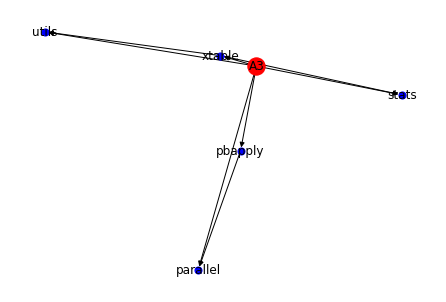

In [33]:
hub_ego_2 = nx.ego_graph(nx.transitive_closure(SG), 'A3', radius=3)
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego_2, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego_2, pos, nodelist=['A3'], node_size=300, node_color='r')
nx.draw_networkx_labels(hub_ego_2, pos)
plt.show()

In [34]:
nx.write_graphml_lxml(hub_ego, "A3.graphml")
nx.write_graphml_lxml(hub_ego_2, "A3_trans.graphml")

In [68]:
print('TG')
metricas_grafo(TG)

TG
AVG CLUSTERING: 0.3083913739875036
AVG PATH: 2.2100130707487793
TG_nobase
AVG CLUSTERING: 0.2391909480108407


NetworkXError: Graph is not connected.

In [76]:
print('TG_nobase')
metricas_grafo(TG_nobase)

TG_nobase
AVG CLUSTERING: 0.25957652538875126
AVG PATH: 2.9373698708895515


In [ ]:
# Fer els ERDOS RENYI

G = nx.gnm_random_graph(n, m)